<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [2]:
# Выгрузка всех вакансий Сбербанка (с обходом ограничения на 2000 запросов)

last_date = datetime.datetime.today()+relativedelta(days=1)
first_date = datetime.datetime.today()-relativedelta(months=2)

def getPage(page = 0):
    params = {
        'employer_id': '3529',
        'area': 113,
        'page': page,
        'per_page': 100,
        'date_from': first_date.strftime('%Y-%m-%d'),
        'date_to': first_date.strftime('%Y-%m-%d'),
        'responses_count_enabled': True
    }
    req = requests.get('https://api.hh.ru/vacancies', params)
    data = req.content.decode()
    req.close()
    return data

all_vacancies=[]
while first_date <= last_date:
    print((first_date-relativedelta(days=1)).strftime('%Y-%m-%d'))
    for page in tqdm(range(json.loads(getPage(0)).get('pages'))):
        vacancies = json.loads(getPage(page))
        vacancy_ids = [el.get('id') for el in vacancies.get('items')]
        all_vacancies.extend(vacancy_ids)
    print(len(all_vacancies))
    first_date += datetime.timedelta(days = 1)


2021-11-19


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-20


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-21


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-22


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-23


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-24


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-25


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-26


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-27


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-28


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-29


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-11-30


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-12-01


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-12-02


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-12-03


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-12-04


  0%|          | 0/1 [00:00<?, ?it/s]

0
2021-12-05


  0%|          | 0/1 [00:00<?, ?it/s]

9
2021-12-06


  0%|          | 0/1 [00:00<?, ?it/s]

9
2021-12-07


  0%|          | 0/1 [00:00<?, ?it/s]

11
2021-12-08


  0%|          | 0/1 [00:00<?, ?it/s]

11
2021-12-09


  0%|          | 0/1 [00:00<?, ?it/s]

12
2021-12-10


  0%|          | 0/1 [00:00<?, ?it/s]

12
2021-12-11


  0%|          | 0/1 [00:00<?, ?it/s]

12
2021-12-12


  0%|          | 0/1 [00:00<?, ?it/s]

33
2021-12-13


  0%|          | 0/2 [00:00<?, ?it/s]

153
2021-12-14


  0%|          | 0/1 [00:00<?, ?it/s]

246
2021-12-15


  0%|          | 0/1 [00:00<?, ?it/s]

338
2021-12-16


  0%|          | 0/2 [00:00<?, ?it/s]

446
2021-12-17


  0%|          | 0/1 [00:00<?, ?it/s]

458
2021-12-18


  0%|          | 0/1 [00:00<?, ?it/s]

467
2021-12-19


  0%|          | 0/2 [00:00<?, ?it/s]

635
2021-12-20


  0%|          | 0/2 [00:00<?, ?it/s]

775
2021-12-21


  0%|          | 0/2 [00:00<?, ?it/s]

917
2021-12-22


  0%|          | 0/2 [00:00<?, ?it/s]

1036
2021-12-23


  0%|          | 0/2 [00:00<?, ?it/s]

1187
2021-12-24


  0%|          | 0/1 [00:00<?, ?it/s]

1217
2021-12-25


  0%|          | 0/1 [00:00<?, ?it/s]

1230
2021-12-26


  0%|          | 0/3 [00:00<?, ?it/s]

1445
2021-12-27


  0%|          | 0/2 [00:00<?, ?it/s]

1631
2021-12-28


  0%|          | 0/3 [00:00<?, ?it/s]

1846
2021-12-29


  0%|          | 0/2 [00:00<?, ?it/s]

1994
2021-12-30


  0%|          | 0/1 [00:00<?, ?it/s]

2062
2021-12-31


  0%|          | 0/1 [00:00<?, ?it/s]

2062
2022-01-01


  0%|          | 0/1 [00:00<?, ?it/s]

2063
2022-01-02


  0%|          | 0/1 [00:00<?, ?it/s]

2063
2022-01-03


  0%|          | 0/1 [00:00<?, ?it/s]

2063
2022-01-04


  0%|          | 0/1 [00:00<?, ?it/s]

2074
2022-01-05


  0%|          | 0/1 [00:00<?, ?it/s]

2082
2022-01-06


  0%|          | 0/1 [00:00<?, ?it/s]

2085
2022-01-07


  0%|          | 0/1 [00:00<?, ?it/s]

2090
2022-01-08


  0%|          | 0/1 [00:00<?, ?it/s]

2130
2022-01-09


  0%|          | 0/4 [00:00<?, ?it/s]

2451
2022-01-10


  0%|          | 0/4 [00:00<?, ?it/s]

2763
2022-01-11


  0%|          | 0/3 [00:00<?, ?it/s]

3045
2022-01-12


  0%|          | 0/4 [00:00<?, ?it/s]

3408
2022-01-13


  0%|          | 0/3 [00:00<?, ?it/s]

3650
2022-01-14


  0%|          | 0/1 [00:00<?, ?it/s]

3678
2022-01-15


  0%|          | 0/1 [00:00<?, ?it/s]

3713
2022-01-16


  0%|          | 0/5 [00:00<?, ?it/s]

4151
2022-01-17


  0%|          | 0/4 [00:00<?, ?it/s]

4452
2022-01-18


  0%|          | 0/4 [00:00<?, ?it/s]

4799
2022-01-19


  0%|          | 0/7 [00:00<?, ?it/s]

5494
2022-01-20


  0%|          | 0/1 [00:00<?, ?it/s]

5494


In [3]:
# Все описания этих вакансий
last_date = datetime.datetime.today()+relativedelta(days=1)
first_date = datetime.datetime.today()-relativedelta(months=2)

vacancies_info=[]
while first_date <= last_date:
    print((first_date-relativedelta(days=1)).strftime('%Y-%m-%d'))
    for page in tqdm(range(json.loads(getPage(0)).get('pages'))):
        vacancies = json.loads(getPage(page))
        vacancy_ids = [el.get('name') for el in vacancies.get('items')]
        vacancies_info.extend(vacancy_ids)
    first_date += datetime.timedelta(days = 1)


2021-11-19


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-20


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-21


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-22


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-23


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-24


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-25


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-26


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-27


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-28


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-29


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-30


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-01


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-02


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-03


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-04


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-05


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-06


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-07


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-08


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-09


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-10


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-11


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-12


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-13


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-14


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-15


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-16


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-17


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-18


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-19


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-20


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-21


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-22


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-23


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-24


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-25


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-26


  0%|          | 0/3 [00:00<?, ?it/s]

2021-12-27


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-28


  0%|          | 0/3 [00:00<?, ?it/s]

2021-12-29


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-30


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-31


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-01


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-02


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-03


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-04


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-05


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-06


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-07


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-08


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-09


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-10


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-11


  0%|          | 0/3 [00:00<?, ?it/s]

2022-01-12


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-13


  0%|          | 0/3 [00:00<?, ?it/s]

2022-01-14


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-15


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-16


  0%|          | 0/5 [00:00<?, ?it/s]

2022-01-17


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-18


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-19


  0%|          | 0/8 [00:00<?, ?it/s]

2022-01-20


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Vacancy DataFrame с полем skills

last_date = datetime.datetime.today()+relativedelta(days=1)
first_date = datetime.datetime.today()-relativedelta(months=2)

vacancies_skills=[]
while first_date <= last_date:
    print((first_date-relativedelta(days=1)).strftime('%Y-%m-%d'))
    for page in tqdm(range(json.loads(getPage(0)).get('pages'))):
        vacancies = json.loads(getPage(page))
        vacancy_ids = [{el.get('name'): (el.get('snippet')).get('requirement')} for el in vacancies.get('items')]
        vacancies_skills.extend(vacancy_ids)
    first_date += datetime.timedelta(days = 1)

2021-11-19


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-20


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-21


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-22


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-23


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-24


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-25


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-26


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-27


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-28


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-29


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-30


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-01


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-02


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-03


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-04


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-05


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-06


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-07


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-08


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-09


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-10


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-11


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-12


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-13


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-14


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-15


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-16


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-17


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-18


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-19


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-20


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-21


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-22


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-23


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-24


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-25


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-26


  0%|          | 0/3 [00:00<?, ?it/s]

2021-12-27


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-28


  0%|          | 0/3 [00:00<?, ?it/s]

2021-12-29


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-30


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-31


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-01


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-02


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-03


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-04


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-05


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-06


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-07


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-08


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-09


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-10


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-11


  0%|          | 0/3 [00:00<?, ?it/s]

2022-01-12


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-13


  0%|          | 0/3 [00:00<?, ?it/s]

2022-01-14


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-15


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-16


  0%|          | 0/5 [00:00<?, ?it/s]

2022-01-17


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-18


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-19


  0%|          | 0/8 [00:00<?, ?it/s]

In [5]:
# Перевод даты публикаций в datetime
last_date = datetime.datetime.today()+relativedelta(days=1)
first_date = datetime.datetime.today()-relativedelta(months=2)

def data_converter(a):
    result = datetime.datetime(int(a[0:4]),int(a[5:7]),int(a[8:10]))
    return result

vacancies_dates=[]
while first_date <= last_date:
    print((first_date-relativedelta(days=1)).strftime('%Y-%m-%d'))
    for page in tqdm(range(json.loads(getPage(0)).get('pages'))):
        vacancies = json.loads(getPage(page))
        vacancy_ids = [data_converter(str(el.get('published_at'))) for el in vacancies.get('items')]
        vacancies_dates.extend(vacancy_ids)
    first_date += datetime.timedelta(days = 1)

2021-11-19


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-20


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-21


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-22


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-23


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-24


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-25


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-26


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-27


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-28


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-29


  0%|          | 0/1 [00:00<?, ?it/s]

2021-11-30


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-01


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-02


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-03


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-04


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-05


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-06


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-07


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-08


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-09


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-10


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-11


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-12


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-13


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-14


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-15


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-16


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-17


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-18


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-19


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-20


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-21


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-22


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-23


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-24


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-25


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-26


  0%|          | 0/3 [00:00<?, ?it/s]

2021-12-27


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-28


  0%|          | 0/3 [00:00<?, ?it/s]

2021-12-29


  0%|          | 0/2 [00:00<?, ?it/s]

2021-12-30


  0%|          | 0/1 [00:00<?, ?it/s]

2021-12-31


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-01


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-02


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-03


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-04


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-05


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-06


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-07


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-08


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-09


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-10


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-11


  0%|          | 0/3 [00:00<?, ?it/s]

2022-01-12


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-13


  0%|          | 0/3 [00:00<?, ?it/s]

2022-01-14


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-15


  0%|          | 0/1 [00:00<?, ?it/s]

2022-01-16


  0%|          | 0/5 [00:00<?, ?it/s]

2022-01-17


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-18


  0%|          | 0/4 [00:00<?, ?it/s]

2022-01-19


  0%|          | 0/8 [00:00<?, ?it/s]

2022-01-20


  0%|          | 0/1 [00:00<?, ?it/s]

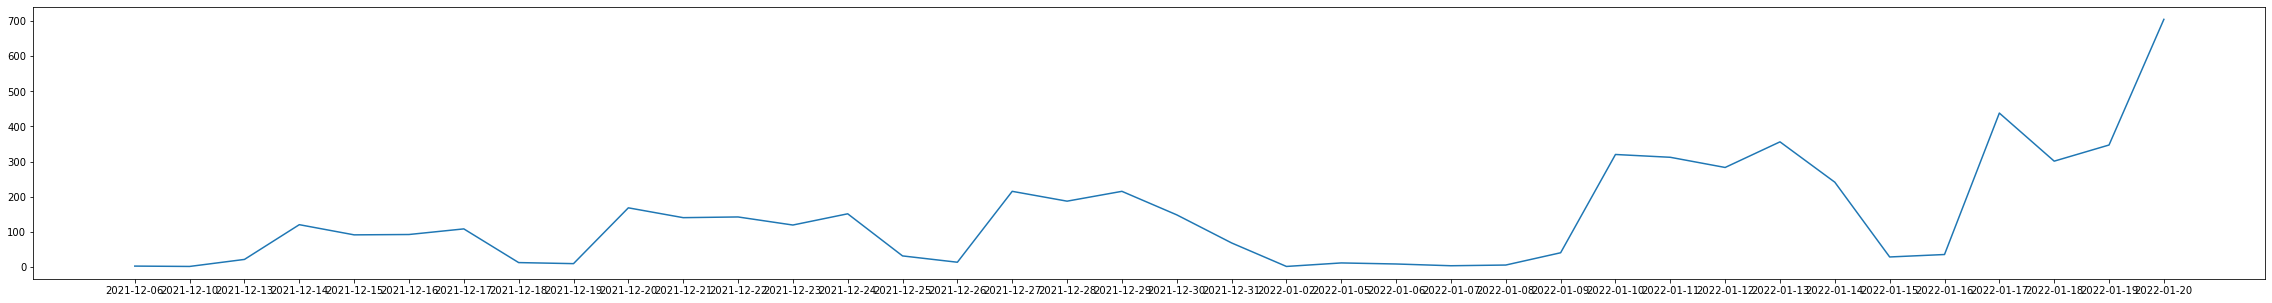

In [6]:
# Постройте график опубликованных вакансий по датам

list_of_date = sorted(list(set(vacancies_dates)))

date_counter = []
date_list=[]
for i in list_of_date:
    counter = 0
    for el in vacancies_dates:
        if el==i:
            counter+=1
    date_counter.append(counter)

for i in list_of_date:
    date_list.append(i.strftime('%Y-%m-%d'))

figure(figsize=(40, 5))
plt.plot(date_list, date_counter)
plt.show()


In [7]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

import statistics

from statistics import mode


list_by_weekdays=[]
for i in vacancies_dates:
    list_by_weekdays.append(i.strftime('%A'))

print(mode(list_by_weekdays))

Thursday


In [8]:
# Найдите те вакансии с использованием python, которые вам интересны
interesting_vacancies=[]
for i in vacancies_skills:
        if str('Python') in str(i.items()):
            print(i)
            interesting_vacancies.append(i)

len(interesting_vacancies)

{'ML-аналитик': 'Знание машинного обучения и статистического анализа. Хорошее знание мат. статистики, алгоритмов, структур данных. Продвинутое знание Python основных библиотек анализа данных. '}
{'Middle Python разработчик': 'Требования: Опыт разработки на Python от 1 года. Знание основных алгоритмов и структур данных. Работа с данными: Знание SQL. '}
{'QA инженер (Python / SQL / С++)': 'Обязательно: 1. Знание основ тестирования ПО. 2. Опыт работы в сфере разработки ПО от года. 3. Уверенное владение двумя из...'}
{'Qa engineer': 'Опыт тестирования, опыт написания автотестов на Python 1-3 года. Опыт написания Bash-скриптов. Опыт работы с Git, Docker-контейнерами...'}
{'Data Analyst Middle/Senior': 'Хорошее знание Python, базовых библиотек для работы с данными и визуализациями (pandas, numpy, scipy, matplotlib, plotly). Развитые soft скиллы, готовность...'}
{'DevOps инженер': 'Навыки администрирования ОС Linux (RHEL/CentOS). Знание скриптовых языков программирования (Bash, Python). Опыт 

197

In [9]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
import string
from collections import Counter

interesting_vacancies_skills=[]
for i in interesting_vacancies:
    vol=[]
    vol=list(i.values())[0]
    vol = str(vol).split()
    interesting_vacancies_skills.append(vol)

exclude = set(string.punctuation)

words = [(''.join(ch for ch in j if ch not in exclude)) for i in interesting_vacancies_skills for j in i]

words=[i.lower() for i in words]



words_to_count = (word for word in words)
c = Counter(words_to_count)
c.most_common(50)

# итого это python, sql, java, linux, bash, pandas, высшее образование, тестирование, машинное обучение

[('опыт', 190),
 ('python', 173),
 ('и', 126),
 ('знание', 125),
 ('работы', 110),
 ('с', 103),
 ('на', 95),
 ('в', 64),
 ('sql', 60),
 ('знания', 45),
 ('разработки', 44),
 ('от', 44),
 ('', 42),
 ('лет', 41),
 ('данных', 40),
 ('программирования', 39),
 ('алгоритмов', 32),
 ('языков', 26),
 ('образование', 25),
 ('понимание', 25),
 ('уровне', 25),
 ('высшее', 24),
 ('владение', 23),
 ('для', 22),
 ('умение', 22),
 ('навыки', 21),
 ('bash', 20),
 ('java', 20),
 ('уверенное', 19),
 ('имеете', 19),
 ('c', 19),
 ('linux', 18),
 ('или', 18),
 ('писать', 18),
 ('машинного', 16),
 ('обучения', 16),
 ('по', 16),
 ('pandas', 16),
 ('структур', 15),
 ('уровень', 15),
 ('практический', 15),
 ('хорошие', 15),
 ('groovy', 15),
 ('области', 15),
 ('базами', 15),
 ('анализа', 14),
 ('тестирования', 14),
 ('из', 14),
 ('приложений', 14),
 ('3', 13)]

In [35]:
# Постройте график наиболее востребованных вакансий

last_date = datetime.datetime.today()+relativedelta(days=1)
first_date = datetime.datetime.today()-relativedelta(months=2)


def getPage(page = 0):
    params = {
        'employer_id': '3529',
        'area': 113,
        'page': page,
        'per_page': 100,
        'date_from': first_date.strftime('%Y-%m-%d'),
        'date_to': first_date.strftime('%Y-%m-%d'),
        'responses_count_enabled': True
    }
    req = requests.get('https://api.hh.ru/vacancies', params)
    data = req.content.decode()
    req.close()
    return data


vacancies_interesting={}
while first_date <= last_date:
    for page in tqdm(range(json.loads(getPage(0)).get('pages'))):
        vacancy_ids={}
        vacancies = json.loads(getPage(page))
        for el in vacancies.get('items'):
            vacancy_ids.update({el.get('name'): (el.get('counters')).get('responses')}) 
        vacancies_interesting.update(vacancy_ids)
    first_date += datetime.timedelta(days = 1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Топ сколько профессий необходимо вывести?
10
[('Водитель-инкассатор ПТС', 423), ('Водитель (персональный)', 392), ('Исполнительный директор (Зарплатные проекты)', 384), ('Junior UX/UI дизайнер', 378), ('Ассистент Управления', 340), ('Модератор видеоконтента в SberDevices', 339), ('Специалист Сбер', 321), ('Дизайнер презентаций', 301), ('Ведущий специалист отдела обработки документов', 297), ('Руководитель юридического направления', 294)]


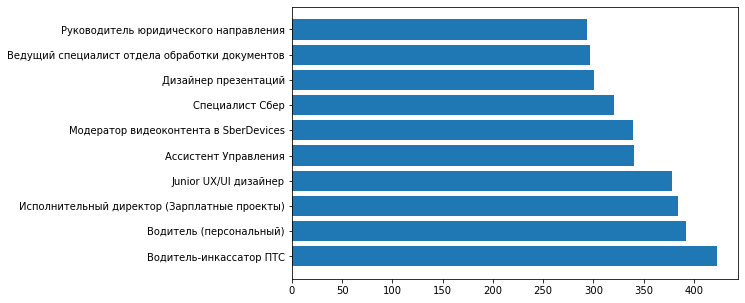

In [36]:
print('Топ сколько профессий необходимо вывести?')
num = input()
d = Counter(vacancies_interesting)
d=d.most_common()[0:int(num)]

keys = list(dict(d).keys())
values = list(dict(d).values())
figure(figsize=(8, 5))
plt.barh(keys, values)
print(d)